In [10]:
from google.colab import files
import pandas as pd

# Fazer o upload do arquivo CSV
uploaded = files.upload()

# Carregando o arquivo CSV para um DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

Saving train.csv to train (1).csv


In [11]:
# Mostrar os primeiros 5 registros para ter uma visão geral do DataFrame
print("Primeiros registros do DataFrame:")
print(df.head())

# Exibir informações sobre o DataFrame, como tipos de dados e contagem de valores não nulos
print("\nInformações gerais sobre o DataFrame:")
df.info()

# Exibir estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas das colunas numéricas:")
print(df.describe())

# Identificar e mostrar a contagem de valores nulos em cada coluna
print("\nContagem de valores nulos por coluna:")
print(df.isnull().sum())

Primeiros registros do DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

In [12]:
# Preencher valores nulos na coluna 'Age' com a média (sem usar inplace)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Seleção de colunas
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]


In [13]:
# Convertendo a variável 'Sex' em variáveis dummy (0 e 1)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Converter a coluna 'Sex_male' para inteiro (0 e 1)
df['Sex_male'] = df['Sex_male'].astype(int)

# Visualizar o DataFrame após as transformações
print("DataFrame após a conversão da variável 'Sex':")
print(df.head())

# Variáveis de entrada X
X = df[['Pclass', 'Age', 'Fare', 'Sex_male']]

# Variável de saída y
y = df['Survived']

# Conferir as variáveis X e y
print("\nVariáveis de entrada (X):")
print(X.head())

print("\nVariável de saída (y):")
print(y.head())


DataFrame após a conversão da variável 'Sex':
   Pclass   Age     Fare  Survived  Sex_male
0       3  22.0   7.2500         0         1
1       1  38.0  71.2833         1         0
2       3  26.0   7.9250         1         0
3       1  35.0  53.1000         1         0
4       3  35.0   8.0500         0         1

Variáveis de entrada (X):
   Pclass   Age     Fare  Sex_male
0       3  22.0   7.2500         1
1       1  38.0  71.2833         0
2       3  26.0   7.9250         0
3       1  35.0  53.1000         0
4       3  35.0   8.0500         1

Variável de saída (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [35]:
#Implementação do KNN
# Importando bibliotecas necessárias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Divisão dos dados em conjunto de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciando o modelo k-NN com k=3
knn = KNeighborsClassifier(n_neighbors=9)

# Treinando o modelo
knn.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Exibindo as previsões
print("Previsões do conjunto de teste:")
print(y_pred)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo k-NN: {accuracy:.2f}")


Previsões do conjunto de teste:
[0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1
 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0]
Acurácia do modelo k-NN: 0.69


In [15]:
# Avaliando desempenho
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[174  42]
 [ 69  72]]


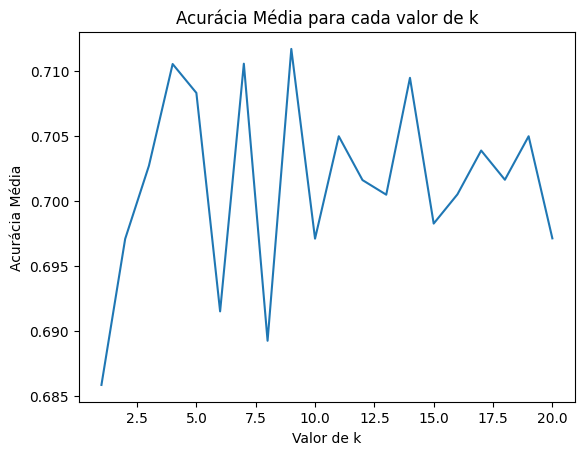

O melhor valor para k é: 9


In [34]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Lista para armazenar as acurácias
accuracy_scores = []

# Testar valores de k de 1 a 20
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Usando validação cruzada com 10 folds
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

    # Adicionar a média das acurácias à lista
    accuracy_scores.append(scores.mean())

# Plotando o gráfico para visualizar o melhor k
plt.plot(k_range, accuracy_scores)
plt.xlabel('Valor de k')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média para cada valor de k')
plt.show()

# Melhor valor de k
best_k = np.argmax(accuracy_scores) + 1
print(f'O melhor valor para k é: {best_k}')
